In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
#from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Fire_Dataset_Path = Path("/content/drive/MyDrive/fire_datset")

In [ ]:
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.png"))

In [ ]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [ ]:
print("FIRE: ", PNG_Labels.count("fire_images"))
print("NO_FIRE: ", PNG_Labels.count("non_fire_images"))

FIRE:  757
NO_FIRE:  244


In [ ]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [ ]:
print(PNG_Path_Series)

0       /content/drive/MyDrive/fire_datset/fire_images...
1       /content/drive/MyDrive/fire_datset/fire_images...
2       /content/drive/MyDrive/fire_datset/fire_images...
3       /content/drive/MyDrive/fire_datset/fire_images...
4       /content/drive/MyDrive/fire_datset/fire_images...
                              ...                        
996     /content/drive/MyDrive/fire_datset/non_fire_im...
997     /content/drive/MyDrive/fire_datset/non_fire_im...
998     /content/drive/MyDrive/fire_datset/non_fire_im...
999     /content/drive/MyDrive/fire_datset/non_fire_im...
1000    /content/drive/MyDrive/fire_datset/non_fire_im...
Name: PNG, Length: 1001, dtype: object


In [ ]:
print(PNG_Labels_Series)

0           fire_images
1           fire_images
2           fire_images
3           fire_images
4           fire_images
             ...       
996     non_fire_images
997     non_fire_images
998     non_fire_images
999     non_fire_images
1000    non_fire_images
Name: CATEGORY, Length: 1001, dtype: object


In [ ]:
PNG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [ ]:
print(PNG_Labels_Series)

0          FIRE
1          FIRE
2          FIRE
3          FIRE
4          FIRE
         ...   
996     NO_FIRE
997     NO_FIRE
998     NO_FIRE
999     NO_FIRE
1000    NO_FIRE
Name: CATEGORY, Length: 1001, dtype: object


In [ ]:
# @title TRANSFORMATION TO DATAFRAME STRUCTURE
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
1    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
2    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
3    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
4    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
..                                                 ...      ...
995  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
996  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
997  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
998  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
999  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE

[1000 rows x 2 columns]


In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
1    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
2    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
3    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
4    /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
..                                                 ...      ...
995  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
996  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
997  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
998  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
999  /content/drive/MyDrive/fire_datset/fire_images...     FIRE

[1000 rows x 2 columns]


In [ ]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

/content/drive/MyDrive/fire_datset/fire_images/fire.486.png
FIRE
/content/drive/MyDrive/fire_datset/fire_images/fire.51.png
FIRE
/content/drive/MyDrive/fire_datset/fire_images/fire.381.png
FIRE
/content/drive/MyDrive/fire_datset/fire_images/fire.274.png
FIRE


In [ ]:
remove_PNG = '../input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png'
Main_Train_Data = Main_Train_Data.loc[~(Main_Train_Data.loc[:,'PNG'] == remove_PNG),:]

In [ ]:
print(Main_Train_Data.loc[Main_Train_Data.loc[:,'PNG'] == remove_PNG,:])

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
1    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
2    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
3    /content/drive/MyDrive/fire_datset/fire_images...     FIRE
4    /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
..                                                 ...      ...
995  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
996  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
997  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
998  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
999  /content/drive/MyDrive/fire_datset/fire_images...     FIRE

[1000 rows x 2 columns]


In [ ]:
#@title VISUALISATION
plt.style.use("dark_background")

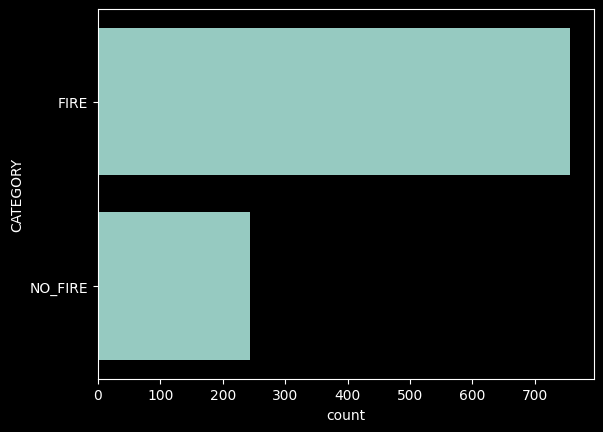

In [ ]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

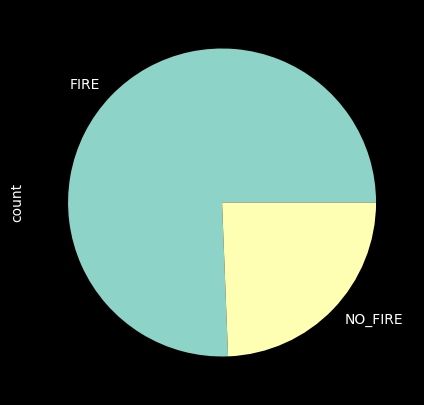

In [ ]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'FIRE')

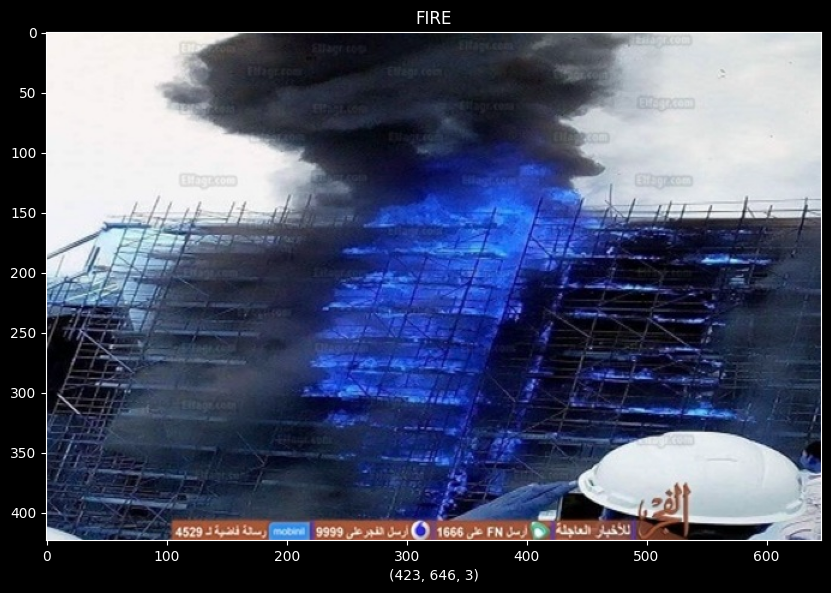

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'NO_FIRE')

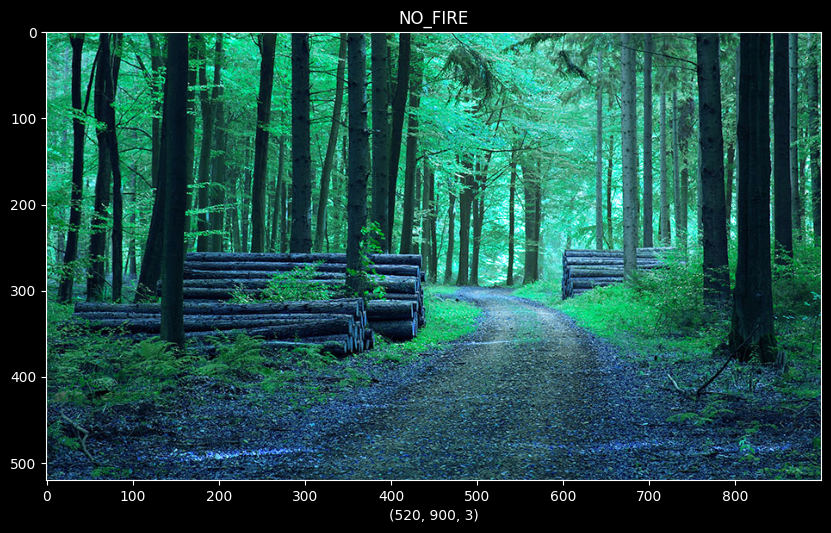

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][993])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][993])

Text(0.5, 1.0, 'FIRE')

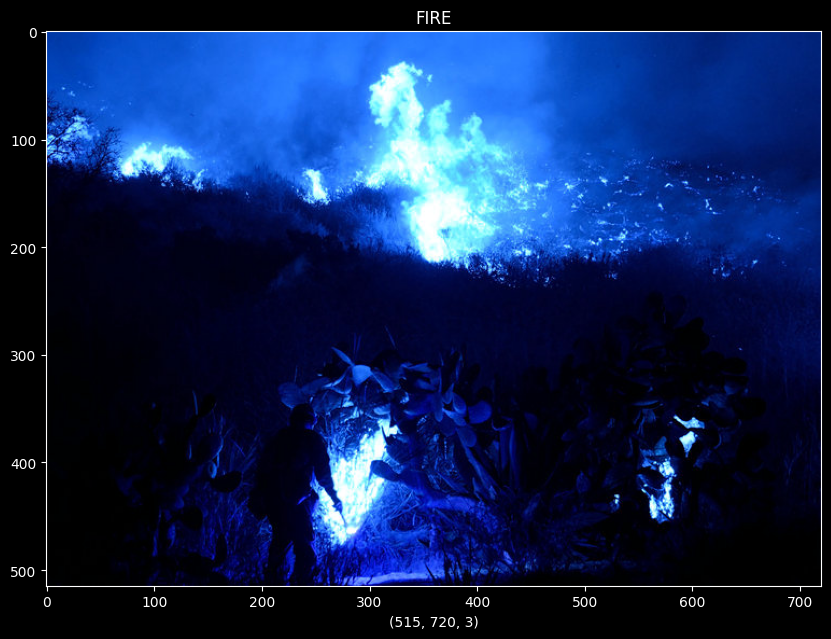

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][20])

Text(0.5, 1.0, 'FIRE')

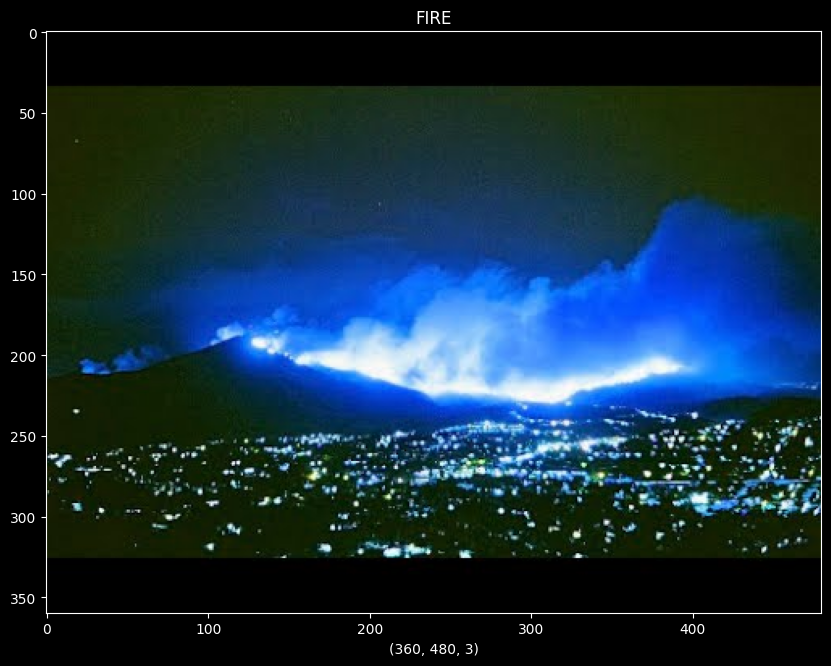

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][48])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][48])

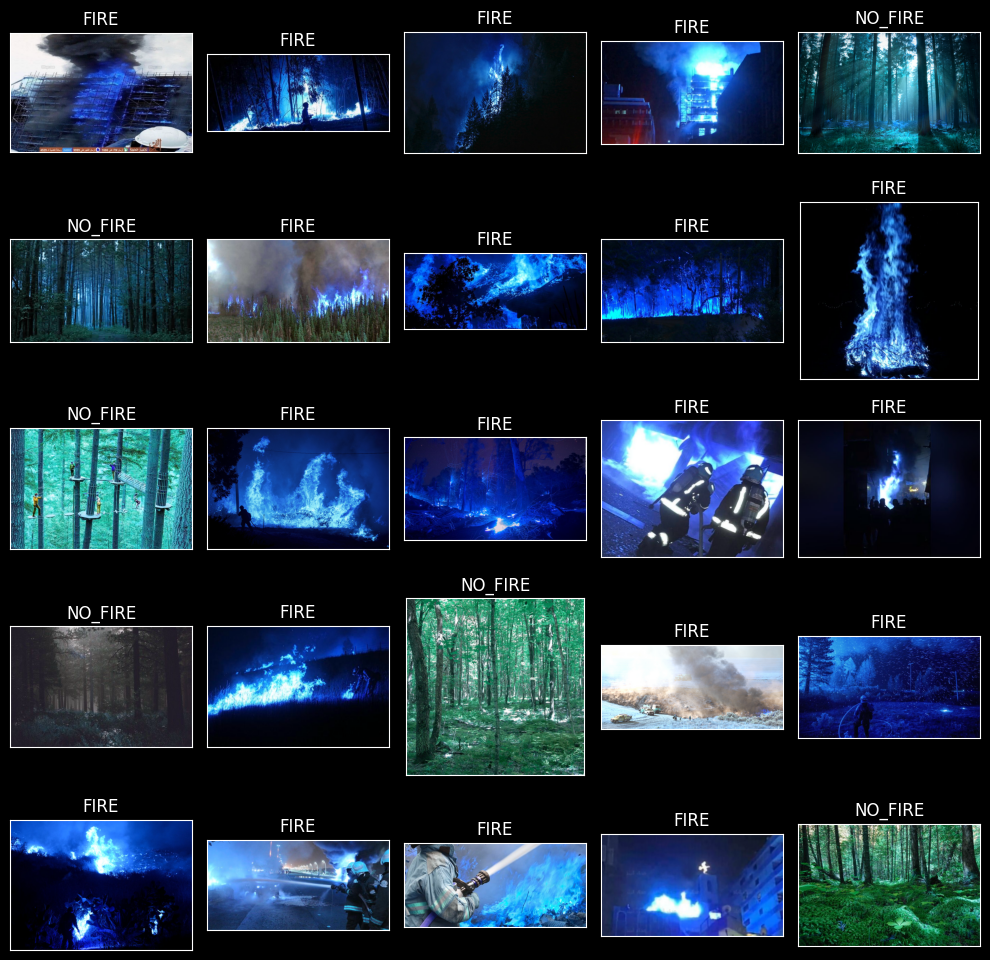

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["PNG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [ ]:
#@title DETERMINATION TRAIN AND TEST DATA
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [ ]:
Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (900, 2)
TEST SHAPE:  (101, 2)


In [ ]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                   PNG CATEGORY
351  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
601  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
256  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
636  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
799  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
..                                                 ...      ...
71   /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
106  /content/drive/MyDrive/fire_datset/fire_images...     FIRE
270  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
860  /content/drive/MyDrive/fire_datset/non_fire_im...  NO_FIRE
435  /content/drive/MyDrive/fire_datset/fire_images...     FIRE

[899 rows x 2 columns]
--------------------------------------------------------------------------------
                                                   PNG CATEGORY
521  /content/drive/MyDrive/fire_datset/fire_images...     FIRE

In [ ]:
print(Test_Data["CATEGORY"].value_counts())

CATEGORY
FIRE       81
NO_FIRE    20
Name: count, dtype: int64


In [ ]:
encode = LabelEncoder()

In [ ]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

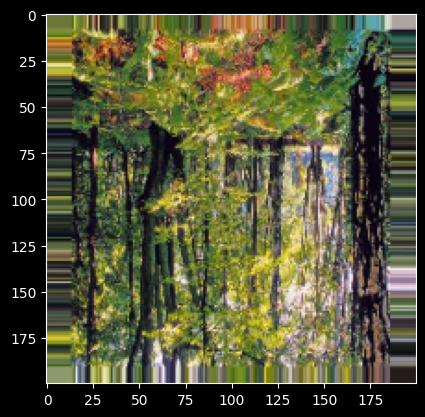

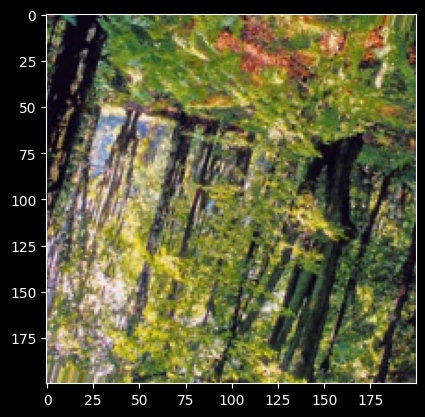

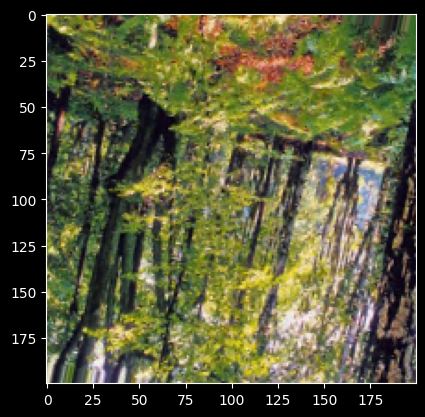

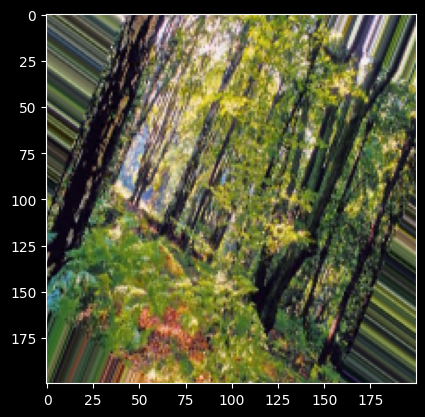

In [ ]:
example_Image = Train_Data["PNG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 810 validated image filenames belonging to 2 classes.


In [ ]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 90 validated image filenames belonging to 2 classes.


In [ ]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 101 validated image filenames belonging to 2 classes.


In [ ]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)


In [ ]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [ ]:
#@title FULLY-CONNECTED
Model_Two = tf.keras.models.Sequential([
  # inputs
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(256,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])

In [ ]:
Model_Two.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
ANN_Model = Model_Two.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=Call_Back,
                      epochs=100)

Epoch 1/100
26/26 [==============================] - 72s 3s/step - loss: 0.5545 - accuracy: 0.7296 - val_loss: 0.3792 - val_accuracy: 0.8000
Epoch 2/100
26/26 [==============================] - 58s 2s/step - loss: 0.4185 - accuracy: 0.7704 - val_loss: 0.3411 - val_accuracy: 0.8444
Epoch 3/100
26/26 [==============================] - 55s 2s/step - loss: 0.3481 - accuracy: 0.8148 - val_loss: 0.3176 - val_accuracy: 0.8444
Epoch 4/100
26/26 [==============================] - 54s 2s/step - loss: 0.3017 - accuracy: 0.8827 - val_loss: 0.2074 - val_accuracy: 0.9222
Epoch 5/100
26/26 [==============================] - 56s 2s/step - loss: 0.2372 - accuracy: 0.9111 - val_loss: 0.2246 - val_accuracy: 0.9111
Epoch 6/100
26/26 [==============================] - 54s 2s/step - loss: 0.2362 - accuracy: 0.9086 - val_loss: 0.1754 - val_accuracy: 0.9222
Epoch 7/100
26/26 [==============================] - 55s 2s/step - loss: 0.2103 - accuracy: 0.9222 - val_loss: 0.2625 - val_accuracy: 0.9222
Epoch 8/100
2

In [ ]:
print(Model_Two.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None   0         
                             )                                   
                                                                 
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               25165952  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                      

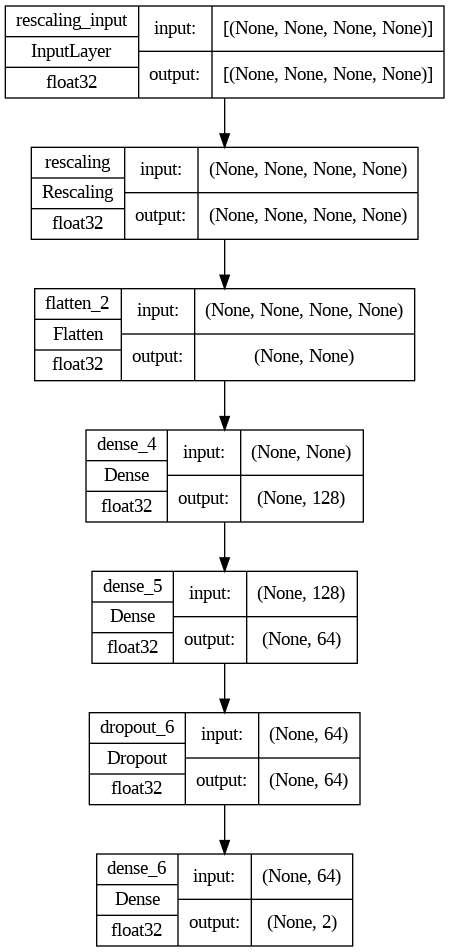

In [ ]:
plot_model(Model_Two,to_file="Model_Two.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [ ]:
Model_Results_Two = Model_Two.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

4/4 [==============================] - 2s 346ms/step - loss: 0.0941 - accuracy: 0.9604
LOSS:  0.0941
ACCURACY:  0.96


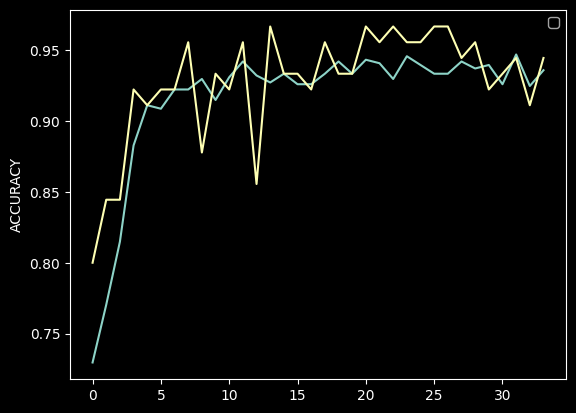

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [ ]:
Prediction_Two = Model_Two.predict(Test_IMG_Set)
Prediction_Two = Prediction_Two.argmax(axis=-1)

4/4 [==============================] - 2s 325ms/step


In [ ]:
print(Prediction_Two)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [ ]:
Prediction_Class_Two = Model_Two.predict(Test_IMG_Set)
predicted_classes = np.argmax(Prediction_Class_Two, axis=1)

4/4 [==============================] - 2s 427ms/step


In [ ]:
print(predicted_classes)

[0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0]


In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Prediction_Two[i]}")
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image_path = "/content/drive/MyDrive/fire_datset/fire_images/fire.1.png"
img = image.load_img(image_path,target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [ ]:
Diff_Pred = Model_Two.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

1/1 [==============================] - 0s 200ms/step
[0]
